# TP 3

## Importaciones generales y cargo de csv's

In [2]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import numpy as np
import time

## Modelo 1 - Random Forest

### Cargo los archivos ya encodeados

In [3]:
df_train = pd.read_csv("df_train_encodeado_completo (3).csv")
#df_test = pd.read_csv("df_test_encoding_completo.csv")

In [4]:
df_train

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,moto,mra58k,nan,nrd90m,rv,samsung,sm,trident,windows,r16nw
0,2987000,0,86400,68.50,13926,0.00,150.00,142.00,315.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2987001,0,86401,29.00,2755,404.00,150.00,102.00,325.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2987002,0,86469,59.00,4663,490.00,150.00,166.00,330.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2987003,0,86499,50.00,18132,567.00,150.00,117.00,476.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2987004,0,86506,50.00,4497,514.00,150.00,102.00,420.00,87.00,...,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543134,3530134,0,14327565,917.81,12544,321.00,150.00,226.00,184.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
543135,3530135,0,14327595,26.95,12598,111.00,150.00,166.00,310.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
543136,3530136,0,14327620,117.00,11919,170.00,150.00,224.00,204.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
543137,3530137,0,14327620,102.00,12449,174.00,150.00,117.00,143.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [5]:
for i in df_train.columns: 
    promedio = 100*df_train[i].isnull().sum()/len(df_train[i])
    if (promedio > 0):
        print("La columna " + i + " tiene " + str(promedio) + " % de elementos nulos")

La columna C1 tiene 0.00018411493190509243 % de elementos nulos
La columna C2 tiene 0.00018411493190509243 % de elementos nulos
La columna C3 tiene 0.00018411493190509243 % de elementos nulos
La columna C4 tiene 0.00018411493190509243 % de elementos nulos
La columna C5 tiene 0.00018411493190509243 % de elementos nulos
La columna C6 tiene 0.00018411493190509243 % de elementos nulos
La columna C7 tiene 0.00018411493190509243 % de elementos nulos
La columna C8 tiene 0.00018411493190509243 % de elementos nulos
La columna C9 tiene 0.00018411493190509243 % de elementos nulos
La columna C10 tiene 0.00018411493190509243 % de elementos nulos
La columna C11 tiene 0.00018411493190509243 % de elementos nulos
La columna C12 tiene 0.00018411493190509243 % de elementos nulos
La columna C13 tiene 0.00018411493190509243 % de elementos nulos
La columna C14 tiene 0.00018411493190509243 % de elementos nulos
La columna D1 tiene 0.00018411493190509243 % de elementos nulos
La columna D2 tiene 0.0001841149319

In [6]:
df_train.fillna(0, inplace = True)
df_train

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,moto,mra58k,nan,nrd90m,rv,samsung,sm,trident,windows,r16nw
0,2987000,0,86400,68.50,13926,0.00,150.00,142.00,315.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2987001,0,86401,29.00,2755,404.00,150.00,102.00,325.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2987002,0,86469,59.00,4663,490.00,150.00,166.00,330.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2987003,0,86499,50.00,18132,567.00,150.00,117.00,476.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2987004,0,86506,50.00,4497,514.00,150.00,102.00,420.00,87.00,...,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543134,3530134,0,14327565,917.81,12544,321.00,150.00,226.00,184.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
543135,3530135,0,14327595,26.95,12598,111.00,150.00,166.00,310.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
543136,3530136,0,14327620,117.00,11919,170.00,150.00,224.00,204.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
543137,3530137,0,14327620,102.00,12449,174.00,150.00,117.00,143.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [7]:
columnas = list(df_train.columns)
columnas;

In [8]:
columnas_sin_isFraud = columnas
columnas_sin_isFraud.remove('isFraud')
columnas_sin_isFraud;

In [9]:
columnas_sin_isFraud_y_sin_TransactionID = columnas_sin_isFraud
columnas_sin_isFraud_y_sin_TransactionID.remove('TransactionID')
columnas_sin_isFraud_y_sin_TransactionID;

### Entrenamiento

In [10]:
import numpy as np
import math
from tqdm import tqdm
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix

from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from tqdm import tqdm

In [11]:
points = df_train[columnas_sin_isFraud_y_sin_TransactionID].values
points

array([[8.6400000e+04, 6.8500000e+01, 1.3926000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [8.6401000e+04, 2.9000000e+01, 2.7550000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [8.6469000e+04, 5.9000000e+01, 4.6630000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.4327620e+07, 1.1700000e+02, 1.1919000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.4327620e+07, 1.0200000e+02, 1.2449000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.4327647e+07, 1.7100000e+02, 8.3200000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [12]:
points.size/495

566181.2606060606

In [13]:
labels = df_train['isFraud'].values
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Separo en train y validation

In [104]:
X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size = 0.3, random_state = 0)

In [105]:
# X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.5)

In [106]:
X_train

array([[6.5261270e+06, 4.7950000e+01, 9.5000000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.6338840e+06, 2.5419000e+01, 9.0260000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.2085851e+07, 5.9000000e+01, 7.9740000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.3078680e+06, 7.6023000e+01, 1.4037000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.1032606e+07, 3.3100000e+02, 4.4360000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.5920600e+06, 4.7950000e+01, 1.7640000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [107]:
X_train.shape

(380197, 516)

In [108]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
y_train.shape

(380197,)

In [110]:
X_test

array([[1.3032888e+07, 1.1040000e+03, 1.6659000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.3410120e+06, 4.7950000e+01, 1.2797000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0783470e+06, 1.2995000e+02, 9.5000000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.7141590e+06, 1.7100000e+02, 6.8680000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.2785550e+06, 5.9000000e+01, 1.7188000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [8.5653570e+06, 3.0000000e+02, 9.8030000e+03, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]])

In [111]:
X_test.shape

(162942, 516)

In [112]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [113]:
y_test.shape

(162942,)

#### Best RandomForestClassifier

In [114]:
best_rf_model = RandomForestClassifier(n_estimators = 167, min_samples_split = 2, min_samples_leaf = 4, max_features = 'log2', max_depth = None, bootstrap = True, verbose=300, random_state=0)

In [115]:
best_rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 167
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
building tree 2 of 167
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s
building tree 3 of 167
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.9s remaining:    0.0s
building tree 4 of 167
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.4s remaining:    0.0s
building tree 5 of 167
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.5s remaining:    0.0s
building tree 6 of 167
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   12.8s remaining:    0.0s
building tree 7 of 167
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   14.9s remaining:    0.0s
building tree 8 of 167
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   17.0s remaining:    0.0s
building tree 9 of 167
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   19.2s remaining: 

RandomForestClassifier(max_features='log2', min_samples_leaf=4,
                       n_estimators=167, random_state=0, verbose=300)

In [116]:
print(classification_report(y_train, best_rf_model.predict(X_train)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

In [117]:
roc_auc_score(y_train, best_rf_model.predict_proba(X_train)[:,1])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

0.9829278811524579

In [118]:
print(classification_report(y_test, best_rf_model.predict(X_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

In [119]:
roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:,1])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

0.9217609544626995

### Varío el tamaño de validaion:

Validation al 50%: 

    roc_auc_score(y_train, best_rf_model.predict_proba(X_train)[:,1]) = 0.9826391926370173

    roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:,1]) = 0.9140356693669118

Validation al 40%: 

    roc_auc_score(y_train, best_rf_model.predict_proba(X_train)[:,1]) = 0.982674366145013

    roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:,1]) = 0.9175682514610615

Validation al 30%: 

    roc_auc_score(y_train, best_rf_model.predict_proba(X_train)[:,1]) = 0.9829278811524579

    roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:,1]) = 0.9217609544626995

Validation al 20%: 

    roc_auc_score(y_train, best_rf_model.predict_proba(X_train)[:,1]) = 0.9824256981232595

    roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:,1]) = 0.9251037920788423

Validation al 10%: 

    roc_auc_score(y_train, best_rf_model.predict_proba(X_train)[:,1]) = 0.9823389377445886

    roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:,1]) = 0.929946613077365

### Pruebo el modelo en el de test

In [35]:
df_test = pd.read_csv("df_test_encoding_completo (4).csv")

In [36]:
df_test

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,moto,mra58k,nan,nrd90m,rv,samsung,sm,trident,windows,r16nw
0,3663549,18403224,31.95,10409,111.00,150.00,226.00,170.00,87.00,1.00,...,0,0,1,0,0,0,0,0,0,0
1,3663550,18403263,49.00,4272,111.00,150.00,226.00,299.00,87.00,4.00,...,0,0,1,0,0,0,0,0,0,0
2,3663551,18403310,171.00,4476,574.00,150.00,226.00,472.00,87.00,"2,635.00",...,0,0,1,0,0,0,0,0,0,0
3,3663552,18403310,284.95,10989,360.00,150.00,166.00,205.00,87.00,17.00,...,0,0,1,0,0,0,0,0,0,0
4,3663553,18403317,67.95,18018,452.00,150.00,117.00,264.00,87.00,6.00,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.68,13832,375.00,185.00,224.00,284.00,60.00,0.00,...,0,0,1,0,0,0,0,0,0,0
506687,4170236,34214287,12.17,3154,408.00,185.00,224.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
506688,4170237,34214326,49.00,16661,490.00,150.00,226.00,327.00,87.00,0.00,...,0,0,1,0,0,0,0,0,0,0
506689,4170238,34214337,202.00,16621,516.00,150.00,224.00,177.00,87.00,0.00,...,0,0,1,0,0,0,0,0,0,0


In [37]:
for i in df_test.columns: 
    promedio = 100*df_test[i].isnull().sum()/len(df_test[i])
    if (promedio > 0):
        print("La columna " + i + " tiene " + str(promedio) + " % de elementos nulos")

In [38]:
df_test_resultados = df_test['TransactionID']
df_test_resultados.head()

0    3663549
1    3663550
2    3663551
3    3663552
4    3663553
Name: TransactionID, dtype: int64

In [39]:
df_test.drop(columns = ['TransactionID'], inplace = True)
df_test

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,...,moto,mra58k,nan,nrd90m,rv,samsung,sm,trident,windows,r16nw
0,18403224,31.95,10409,111.00,150.00,226.00,170.00,87.00,1.00,0.00,...,0,0,1,0,0,0,0,0,0,0
1,18403263,49.00,4272,111.00,150.00,226.00,299.00,87.00,4.00,0.00,...,0,0,1,0,0,0,0,0,0,0
2,18403310,171.00,4476,574.00,150.00,226.00,472.00,87.00,"2,635.00",0.00,...,0,0,1,0,0,0,0,0,0,0
3,18403310,284.95,10989,360.00,150.00,166.00,205.00,87.00,17.00,0.00,...,0,0,1,0,0,0,0,0,0,0
4,18403317,67.95,18018,452.00,150.00,117.00,264.00,87.00,6.00,0.00,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,34214279,94.68,13832,375.00,185.00,224.00,284.00,60.00,0.00,0.00,...,0,0,1,0,0,0,0,0,0,0
506687,34214287,12.17,3154,408.00,185.00,224.00,0.00,0.00,0.00,157.00,...,0,0,0,0,0,0,0,0,0,0
506688,34214326,49.00,16661,490.00,150.00,226.00,327.00,87.00,0.00,0.00,...,0,0,1,0,0,0,0,0,0,0
506689,34214337,202.00,16621,516.00,150.00,224.00,177.00,87.00,0.00,0.00,...,0,0,1,0,0,0,0,0,0,0


In [40]:
valores_predecidos = best_rf_model.predict_proba(df_test)
valores_predecidos

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

array([[0.98302852, 0.01697148],
       [0.95682691, 0.04317309],
       [0.95392808, 0.04607192],
       ...,
       [0.96479628, 0.03520372],
       [0.96328482, 0.03671518],
       [0.97504797, 0.02495203]])

In [41]:
lista_de_probas = []

for i in range(len(valores_predecidos)):
    lista_de_probas.append(valores_predecidos[i][1])

lista_de_probas

[0.016971481464443737,
 0.04317308686168554,
 0.04607191961082405,
 0.00951612498534971,
 0.01132783947153652,
 0.01629950158904208,
 0.06144829943428921,
 0.057078852283291744,
 0.013765737311380128,
 0.02574944828065944,
 0.01320445914741946,
 0.010552815998191,
 0.07340782154638888,
 0.011046666540697721,
 0.037330655470269855,
 0.010358405490692092,
 0.02827222585662394,
 0.034104062302520416,
 0.0645036039598974,
 0.026866185566960295,
 0.07813809328999169,
 0.016219202405024422,
 0.03353538884636287,
 0.03242012140370272,
 0.058091065918943516,
 0.03256069511806961,
 0.02270867320983197,
 0.03187276639126488,
 0.040414170391229735,
 0.030757347496571937,
 0.08499405393310934,
 0.03643209821498466,
 0.04114163335608743,
 0.022766961177103112,
 0.009823369885485407,
 0.01411661919339061,
 0.02810728477999535,
 0.07744708182505472,
 0.0903214577061561,
 0.061179437728352264,
 0.11970970150268252,
 0.03950201913431716,
 0.01520999454063158,
 0.03521025484555711,
 0.018749816931702076

In [42]:
submit = pd.concat([df_test_resultados, pd.Series(lista_de_probas, name='isFraud')], axis=1)
submit.set_index('TransactionID', inplace=True)
submit.head()

,isFraud
TransactionID,
3663549,0.02
3663550,0.04
3663551,0.05
3663552,0.01
3663553,0.01


In [43]:
submit.to_csv('submit_random_forest_best_params.csv', index = True)

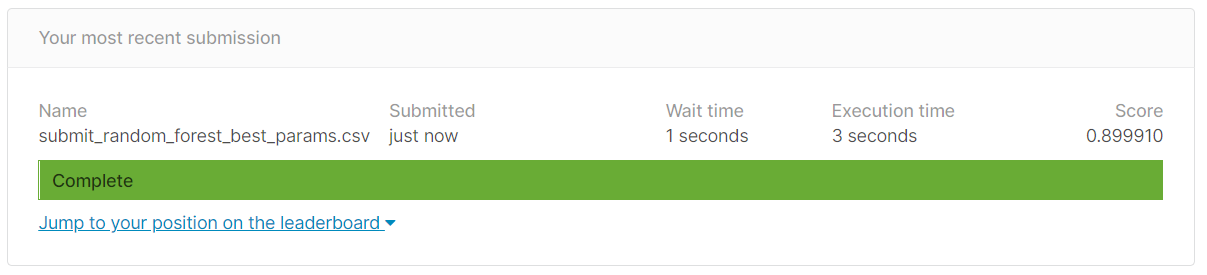
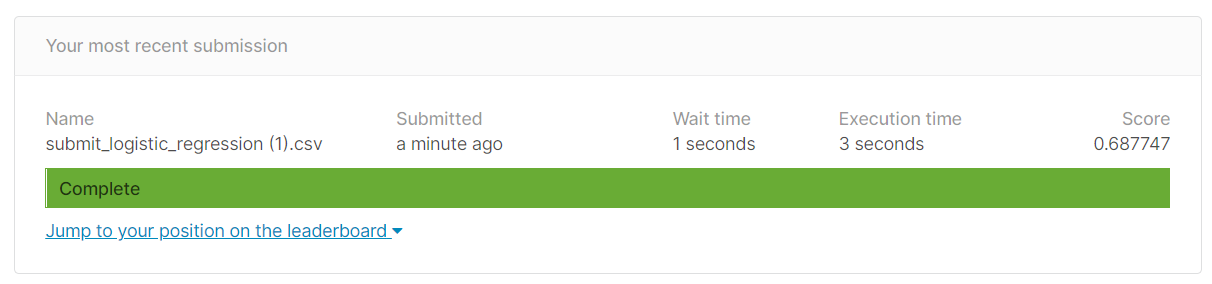

### Parámetros más importantes

In [44]:
len(importance)

516

In [45]:
puntajes_de_las_columnas = {}
count = 1

# summarize feature importance
for i,v in enumerate(importance):
    print(count, ' - Columna', columnas_sin_isFraud_y_sin_TransactionID[i], '  -  Score: %.5f' % (v))
    #puntajes_de_las_columnas.append((columnas_sin_isFraud_y_sin_TransactionID[i], v))
    #puntajes_de_las_columnas.update({v: columnas_sin_isFraud_y_sin_TransactionID[i]})
    puntajes_de_las_columnas.update({columnas_sin_isFraud_y_sin_TransactionID[i] : v})
    
    count = count+1

1  - Columna TransactionDT   -  Score: 0.01058
2  - Columna TransactionAmt   -  Score: 0.01026
3  - Columna card1   -  Score: 0.00900
4  - Columna card2   -  Score: 0.01068
5  - Columna card3   -  Score: 0.00286
6  - Columna card5   -  Score: 0.00568
7  - Columna addr1   -  Score: 0.00753
8  - Columna addr2   -  Score: 0.00167
9  - Columna dist1   -  Score: 0.00309
10  - Columna dist2   -  Score: 0.00134
11  - Columna P_emaildomain   -  Score: 0.00637
12  - Columna R_emaildomain   -  Score: 0.00529
13  - Columna C1   -  Score: 0.01936
14  - Columna C2   -  Score: 0.00927
15  - Columna C3   -  Score: 0.00000
16  - Columna C4   -  Score: 0.01012
17  - Columna C5   -  Score: 0.00144
18  - Columna C6   -  Score: 0.01135
19  - Columna C7   -  Score: 0.00974
20  - Columna C8   -  Score: 0.00706
21  - Columna C9   -  Score: 0.00273
22  - Columna C10   -  Score: 0.00903
23  - Columna C11   -  Score: 0.01228
24  - Columna C12   -  Score: 0.00963
25  - Columna C13   -  Score: 0.01430
26  - Colum

In [46]:
puntajes_de_las_columnas

{'TransactionDT': 0.010575574096593562,
 'TransactionAmt': 0.010262435952265062,
 'card1': 0.009000000971336358,
 'card2': 0.010677689780903278,
 'card3': 0.0028591229996934014,
 'card5': 0.00567661081488136,
 'addr1': 0.007532874249755886,
 'addr2': 0.0016745988655844008,
 'dist1': 0.0030934715105373884,
 'dist2': 0.001341269661337521,
 'P_emaildomain': 0.00636731997172268,
 'R_emaildomain': 0.005294336628579763,
 'C1': 0.01936318591535266,
 'C2': 0.009273374581398465,
 'C3': 2.736036962331603e-06,
 'C4': 0.010118637648385052,
 'C5': 0.001435256831168199,
 'C6': 0.011352970515314401,
 'C7': 0.009743737041361736,
 'C8': 0.00706405869401396,
 'C9': 0.002725003072807315,
 'C10': 0.009030794596071595,
 'C11': 0.012281641621561762,
 'C12': 0.009632144653298863,
 'C13': 0.014296812637275108,
 'C14': 0.013264485871078159,
 'D1': 0.00627234353029394,
 'D2': 0.00611723893539508,
 'D3': 0.0025805237340914187,
 'D4': 0.004701076537052907,
 'D5': 0.002272718166017222,
 'D6': 0.0016321722622866309

In [47]:
len(puntajes_de_las_columnas.keys())

516

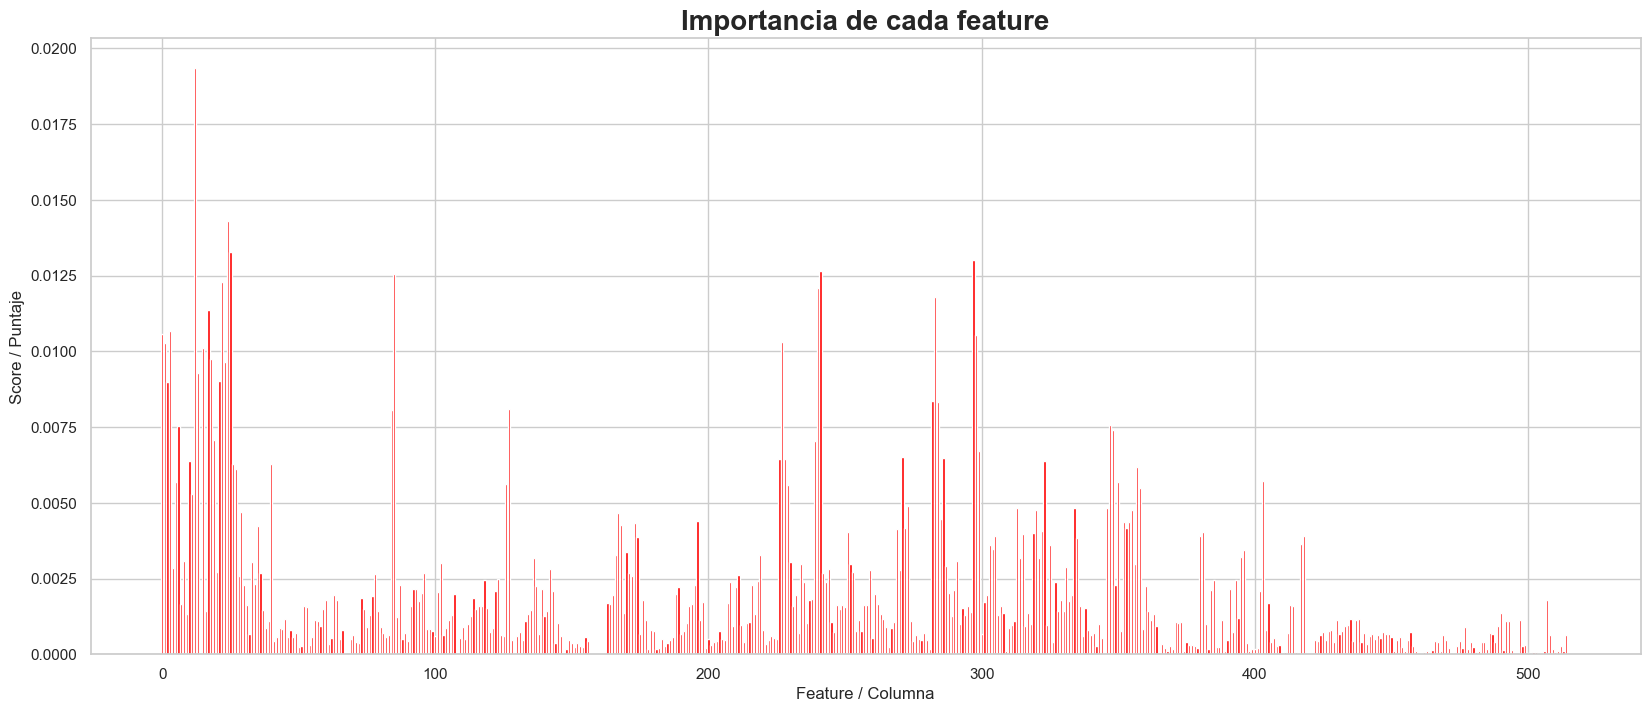

In [48]:
# plot feature importance
fig = plt.figure(figsize = (20, 8))
plt.bar([x for x in range(len(importance))], importance, color ='red')
plt.xlabel("Feature / Columna")
plt.ylabel("Score / Puntaje")
plt.title("Importancia de cada feature", weight = 'bold', size = 20)
plt.show()

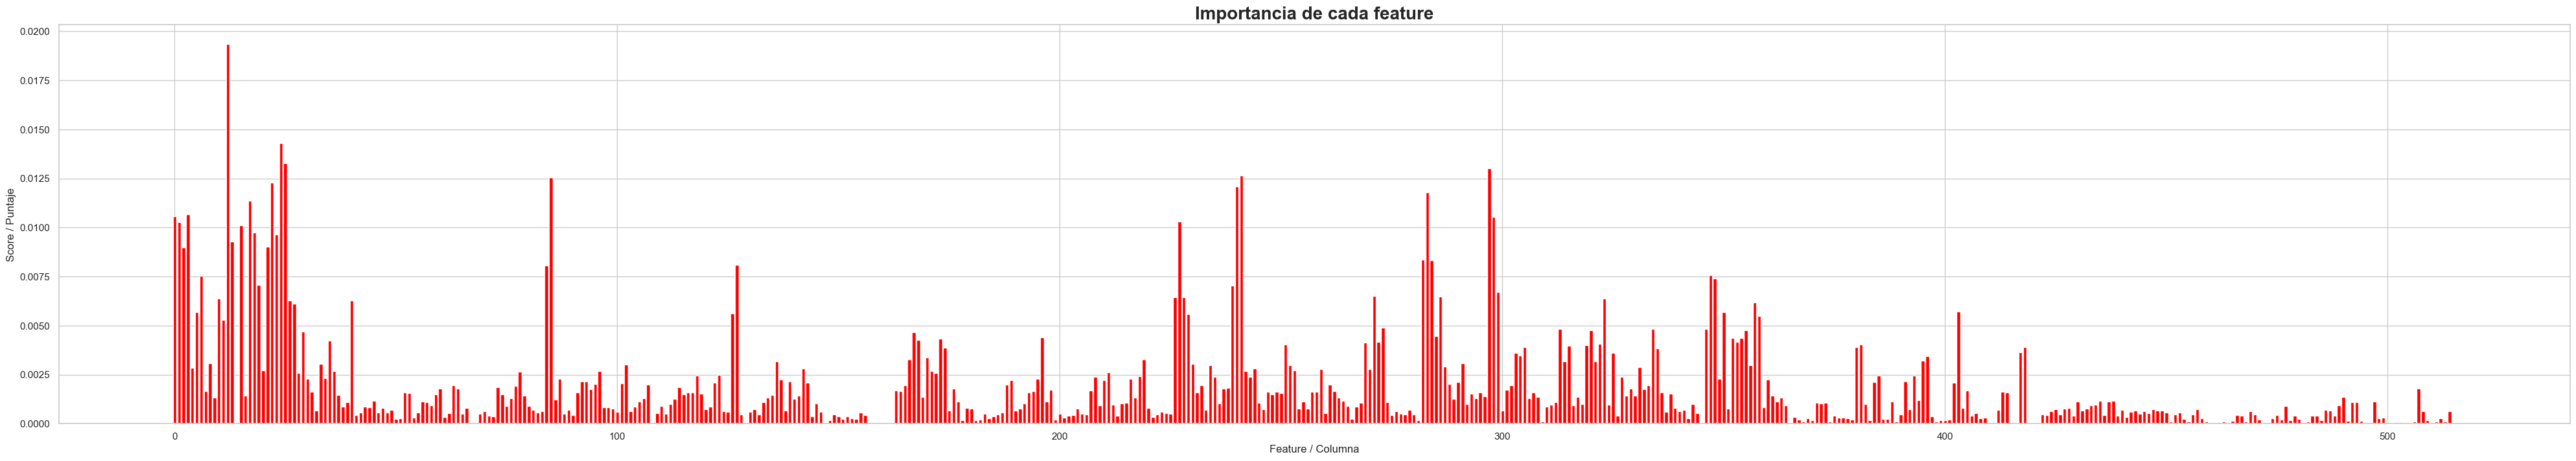

In [49]:
# plot feature importance
fig = plt.figure(figsize = (50, 8))
plt.bar([x for x in range(len(importance))], importance, color ='red')
plt.xlabel("Feature / Columna")
plt.ylabel("Score / Puntaje")
plt.title("Importancia de cada feature", weight = 'bold', size = 20)
plt.show()

In [50]:
parametros_ordenados = pd.DataFrame.from_dict(puntajes_de_las_columnas, orient='index')
parametros_ordenados

,0
TransactionDT,0.01
TransactionAmt,0.01
card1,0.01
card2,0.01
card3,0.00
...,...
samsung,0.00
sm,0.00
trident,0.00
windows,0.00


In [51]:
parametros_ordenados = parametros_ordenados.reset_index()
parametros_ordenados

,index,0
0,TransactionDT,0.01
1,TransactionAmt,0.01
2,card1,0.01
3,card2,0.01
4,card3,0.00
...,...,...
511,samsung,0.00
512,sm,0.00
513,trident,0.00
514,windows,0.00


In [52]:
parametros_ordenados.rename(columns={'index': 'parametro', parametros_ordenados.columns[1]: 'puntaje'},inplace=True)
parametros_ordenados

,parametro,puntaje
0,TransactionDT,0.01
1,TransactionAmt,0.01
2,card1,0.01
3,card2,0.01
4,card3,0.00
...,...,...
511,samsung,0.00
512,sm,0.00
513,trident,0.00
514,windows,0.00


In [53]:
parametros_ordenados = parametros_ordenados.sort_values(by=['puntaje'])
parametros_ordenados

,parametro,puntaje
515,r16nw,0.00
410,ProductCD_nan,0.00
416,card6_charge card,0.00
421,M1_F,0.00
472,id_34_match_status:-1,0.00
...,...,...
241,V201,0.01
297,V257,0.01
25,C14,0.01
24,C13,0.01


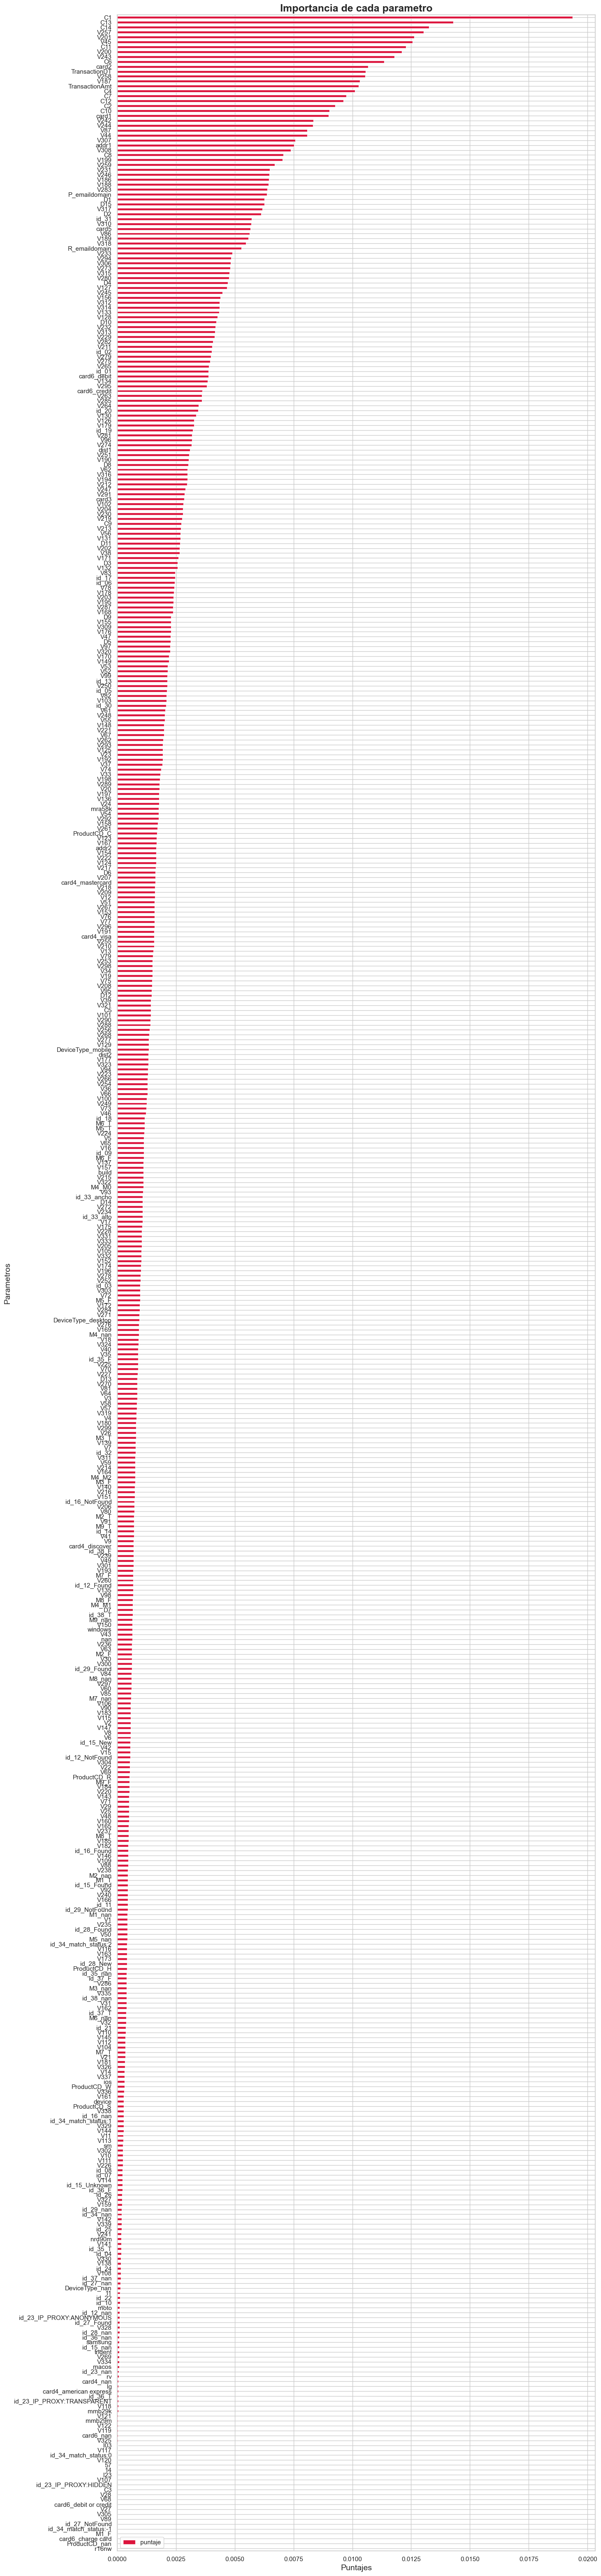

In [54]:
parametros_ordenados.plot.barh("parametro","puntaje",  rot = 0, color = 'crimson', figsize=(15,80))
plt.xlabel('Puntajes', size = 14)
plt.ylabel('Parametros', size = 14)
#plt.legend(("Importancia de cada parametro"),loc="lower right")
plt.title('Importancia de cada parametro', fontweight='bold', size = 18)
plt.show()

A partir de este gráfico se puede suponer que los parámetros más importantes cuando se usaron los lejores parametros son: C1, C13, C14 y V257.